In [1]:
# Author: Yuki
# Datasets: Character Trait Dataset + Top 15000 Anime Dataset
# This is a notebook for analyzing, visualizing, cleaning, merging of our datasets
# This notebook specifically takes care of Gender, Tags columns

In [2]:
import pandas as pd

df = pd.read_pickle('df_cleaned_synopsis.pkl')
df.head()

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List,Cleaned_Anime_Title,Merged_Title,synopsis,Cleaned_Title
0,0,L,Black Hair,Male,"[Analytical, Barefoot, Detective, Eye Bags, Sw...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World...",Death Note,death note,Death Note,"Brutal murders, petty thefts, and senseless vi...",death note
1,1,Kakashi HATAKE,Grey Hair,Male,"[Adult, Anti-Gravity Hair, Beastmaster, Exotic...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...,Boruto: Naruto Next Generations,boruto: naruto next generations,Boruto: Naruto Next Generations,Following the successful end of the Fourth Shi...,boruto: naruto next generations
2,1,Kakashi HATAKE,Grey Hair,Male,"[Adult, Anti-Gravity Hair, Beastmaster, Exotic...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...,Boruto: Naruto the Movie,boruto: naruto the movie,Boruto: Naruto the Movie,"The spirited Boruto Uzumaki, son of Seventh Ho...",boruto: naruto the movie
3,1,Kakashi HATAKE,Grey Hair,Male,"[Adult, Anti-Gravity Hair, Beastmaster, Exotic...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...,Boruto: Naruto the Movie - The Day Naruto Beca...,boruto: naruto the movie - the day naruto beca...,Boruto: Naruto the Movie - The Day Naruto Beca...,Bundled with the limited edition of Blu-ray/DV...,boruto: naruto the movie - the day naruto beca...
4,1,Kakashi HATAKE,Grey Hair,Male,"[Adult, Anti-Gravity Hair, Beastmaster, Exotic...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...,Naruto,naruto,Naruto,"Moments before Naruto Uzumaki's birth, a huge ...",naruto


## Visualization of Gender

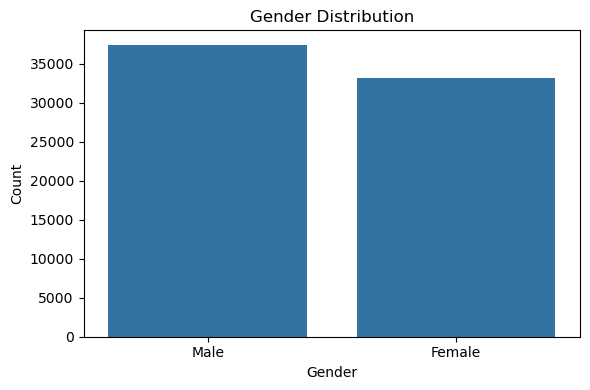

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values
gender_counts = df['Gender'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [5]:
df.shape

(70659, 12)

## Tags Visualization

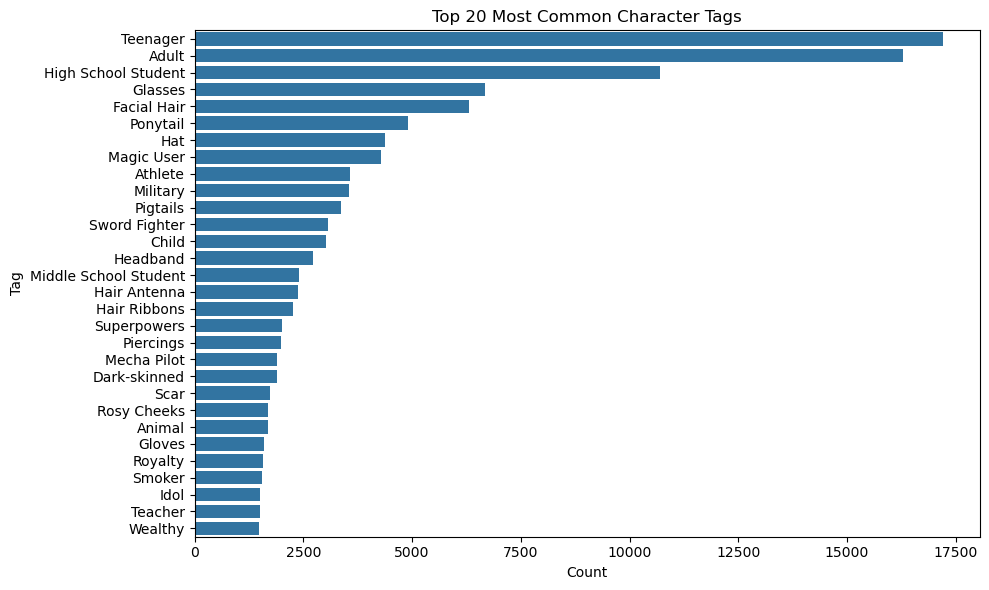

In [7]:
# Explode Tags into individual rows
exploded_tags = df.explode('Tags')

# Count tag frequency
tag_counts = exploded_tags['Tags'].value_counts().head(30)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.values, y=tag_counts.index)
plt.title('Top 20 Most Common Character Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


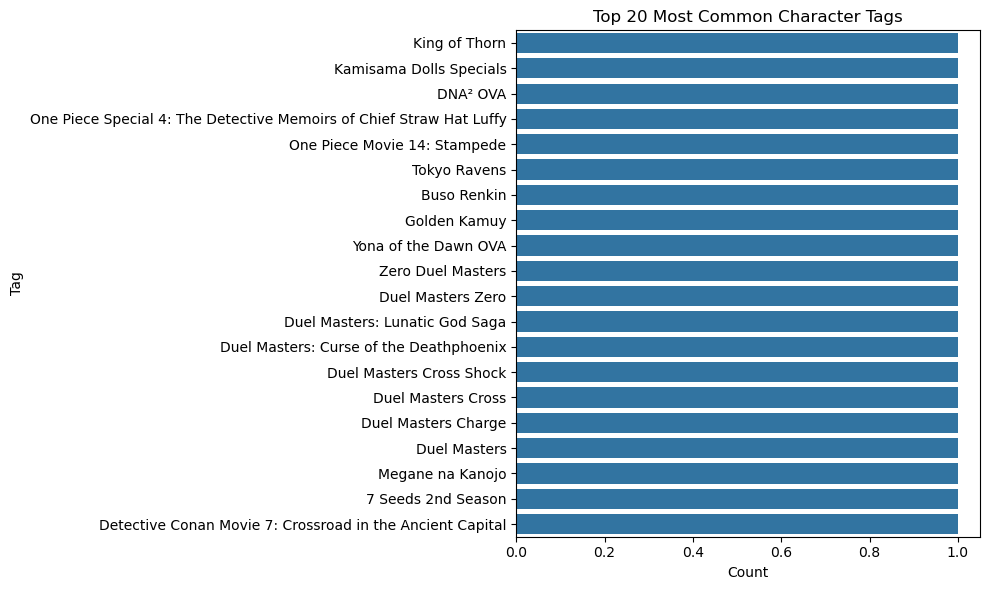

In [8]:
# Explode Tags into individual rows
exploded_tags = df.explode('Tags')

tag_counts = exploded_tags['Tags'].value_counts().tail(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.values, y=tag_counts.index)
plt.title('Top 20 Most Common Character Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


In [9]:
# Try to extract rows where the Tags contain the same anime title as the title in Anime_List
def tag_contains_anime_title(row):
    if not isinstance(row['Tags'], list) or not isinstance(row['Anime_List'], str):
        return False
    anime_title_lower = row['Anime_List'].lower().strip()
    return any(anime_title_lower in tag.lower().strip() for tag in row['Tags'])

suspicious_rows = df[df.apply(tag_contains_anime_title, axis=1)]

suspicious_rows[['Names', 'Tags', 'Anime_List']]

,Names,Tags,Anime_List
943,Shouya ISHIDA,"[A Silent Voice, A Silent Voice Specials]",A Silent Voice
1994,Mikoto SUOH,"[Adult, Piercings, Smoker, Superpowers]",K
2153,Kuroh YATOGAMI,"[Cook, Ponytail, Superpowers, Sword Fighter, T...",K
2270,Neko,"[Catgirl, Choker, Frequently-Naked, Heterochro...",K
2320,Rin KAGA,"[Bunny Drop, Bunny Drop Specials]",Bunny Drop
...,...,...,...
70971,Momo ANIGASAKI,[Gintama'],Gintama
70972,Gaimon FUJIBAYASHI,[Gintama°],Gintama
71024,Nozomu NIKAIDO,[Maison Ikkoku: Kanketsuhen],Maison Ikkoku
71033,Shoko SAYAMA,[Boys Be...],Boys Be...


In [10]:
df = df[~df.apply(tag_contains_anime_title, axis=1)].reset_index(drop=True)

In [11]:
df.to_pickle('df_removed_anime_from_tag.pkl')

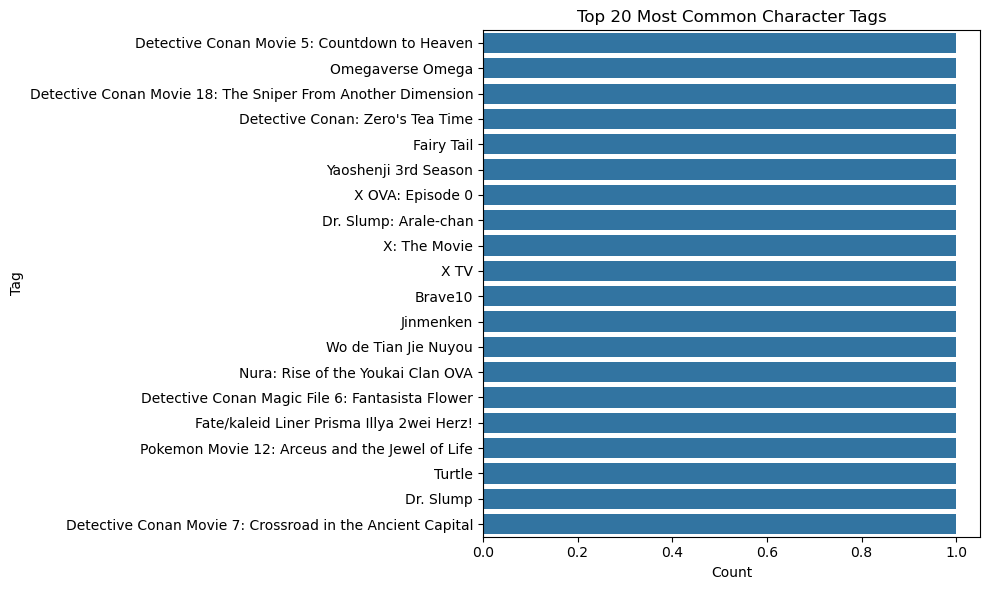

In [12]:
# Explode Tags into individual rows
exploded_tags = df.explode('Tags')

tag_counts = exploded_tags['Tags'].value_counts().tail(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.values, y=tag_counts.index)
plt.title('Top 20 Most Common Character Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


In [13]:
tag_counts = exploded_tags['Tags'].value_counts().tail(30)
tag_counts

Tags
Detective Conan Movie 21: Kara Kurenai no Love Letter                 1
Dr. Slump Movie 7: Arale-chan N-cha! Pengin-mura yori Ai wo komete    1
Doujin Work                                                           1
Dr. Slump Movie 4: Arale-chan Hoyoyo! Nanaba Shiro no Hihou           1
CLAMP in Wonderland                                                   1
Jorogumo                                                              1
Unicorn                                                               1
Descending Stories: Shouwa Genroku Rakugo Shinjuu                     1
Yaoshenji 2nd Season                                                  1
Detective Conan: Episode One - The Great Detective Turned Small       1
Detective Conan Movie 5: Countdown to Heaven                          1
Omegaverse Omega                                                      1
Detective Conan Movie 18: The Sniper From Another Dimension           1
Detective Conan: Zero's Tea Time                           

### Removes the rows with incorrect tags (anime names)

In [14]:
konan = df[df['Tags'].apply(lambda tags: 'Detective Conan' in tags if isinstance(tags, list) else False)]

In [15]:
to_remove = konan.index
df = df.drop(to_remove).reset_index(drop=True)

In [ ]:
# Explode Tags into individual rows
exploded_tags = df.explode('Tags')

# Count tag frequency
tag_counts = exploded_tags['Tags'].value_counts().tail(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.values, y=tag_counts.index)
plt.title('Top 20 Most Common Character Tags')
plt.xlabel('Count')
plt.ylabel('Tag') 
plt.tight_layout()
plt.show()


In [17]:
alare = df[df['Tags'].apply(lambda tags: 'Dr. Slump' in tags if isinstance(tags, list) else False)]

In [18]:
to_remove2 = alare.index
df = df.drop(to_remove2).reset_index(drop=True)

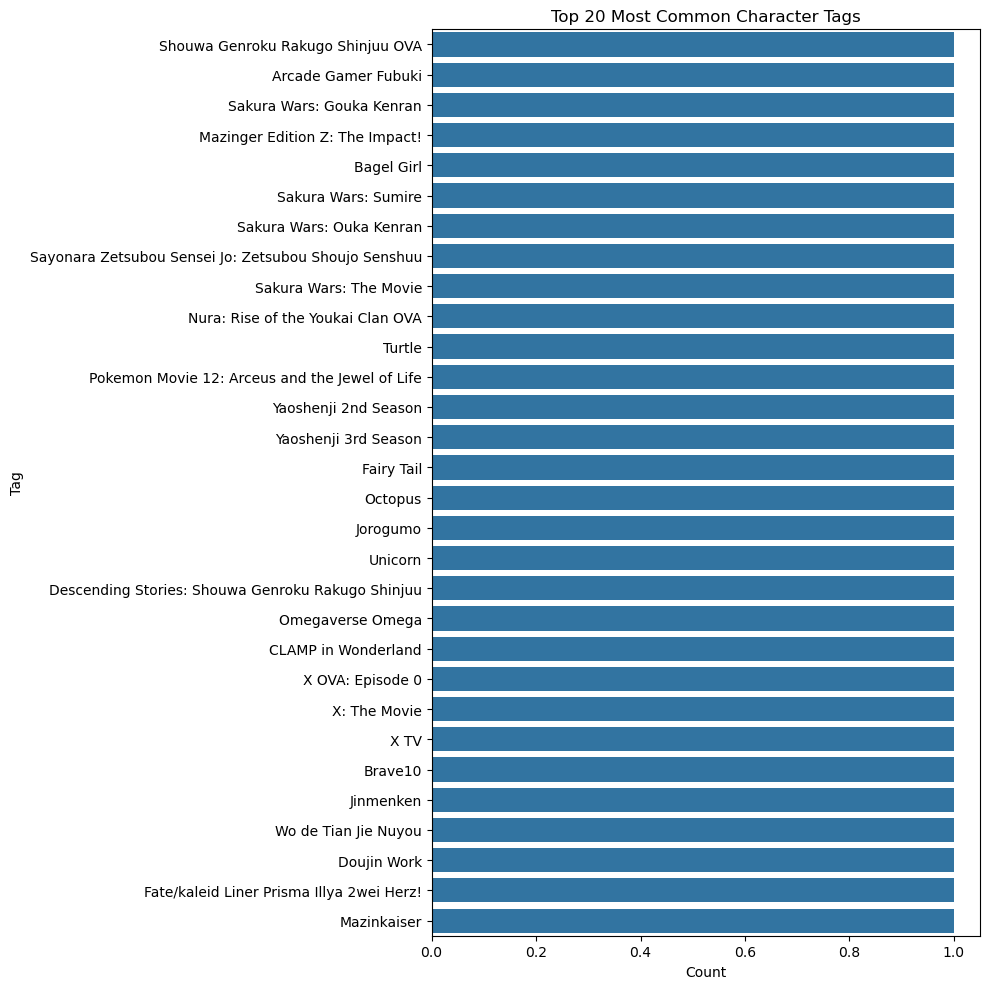

In [73]:
# Explode Tags into individual rows
exploded_tags = df.explode('Tags')

# Count tag frequency
tag_counts = exploded_tags['Tags'].value_counts().tail(30)

# Plot
plt.figure(figsize=(10, 10))
sns.barplot(x=tag_counts.values, y=tag_counts.index)
plt.title('Top 20 Most Common Character Tags')
plt.xlabel('Count')
plt.ylabel('Tag') 
plt.tight_layout()
plt.show()


In [19]:
df.to_pickle('df_removed_konan_drslump_from_tags.pkl')

In [ ]:
single_tag_rows = df[df['Tags'].apply(lambda x: len(x) == 1)]
single_tag_rows.head(50)

In [75]:
least_common_tags = tag_counts.index.tolist()
print(least_common_tags) 

['Shouwa Genroku Rakugo Shinjuu OVA', 'Arcade Gamer Fubuki', 'Sakura Wars: Gouka Kenran', 'Mazinger Edition Z: The Impact!', 'Bagel Girl', 'Sakura Wars: Sumire', 'Sakura Wars: Ouka Kenran', 'Sayonara Zetsubou Sensei Jo: Zetsubou Shoujo Senshuu', 'Sakura Wars: The Movie', 'Nura: Rise of the Youkai Clan OVA', 'Turtle', 'Pokemon Movie 12: Arceus and the Jewel of Life', 'Yaoshenji 2nd Season', 'Yaoshenji 3rd Season', 'Fairy Tail', 'Octopus', 'Jorogumo', 'Unicorn', 'Descending Stories: Shouwa Genroku Rakugo Shinjuu', 'Omegaverse Omega', 'CLAMP in Wonderland', 'X OVA: Episode 0', 'X: The Movie', 'X TV', 'Brave10', 'Jinmenken', 'Wo de Tian Jie Nuyou', 'Doujin Work', 'Fate/kaleid Liner Prisma Illya 2wei Herz!', 'Mazinkaiser']


In [81]:
rows_with_least_common_tags = exploded_tags[exploded_tags['Tags'].isin(least_common_tags)]
rows_with_least_common_tags.head(30) 

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga,Anime_List,Cleaned_Anime_Title,Merged_Title,synopsis,Cleaned_Title
11313,6328,Li NIE,Brown Hair,Male,Yaoshenji 2nd Season,['Tales of Demons and Gods'],NaN,Tales of Demons and Gods,tales of demons and gods,Tales of Demons and Gods,"In his past life, although too weak to protect...",tales of demons and gods
11313,6328,Li NIE,Brown Hair,Male,Yaoshenji 3rd Season,['Tales of Demons and Gods'],NaN,Tales of Demons and Gods,tales of demons and gods,Tales of Demons and Gods,"In his past life, although too weak to protect...",tales of demons and gods
19874,13633,Gray SURGE,Black Hair,Male,Fairy Tail,"['Fairy Tail', 'Fairy Tail: 100 Years Quest']",NaN,Fairy Tail: 100 Years Quest,fairy tail: 100 years quest,Fairy Tail: 100 Years Quest,"For over one hundred years, a special quest ha...",fairy tail: 100 years quest
24175,18111,Yamabuki Otome,Black Hair,Female,Nura: Rise of the Youkai Clan OVA,"['Nura: Rise of the Yokai Clan', 'Nura: Rise o...",NaN,Nura: Rise of the Yokai Clan,nura: rise of the yokai clan,Nura: Rise of the Yokai Clan,"Rikuo Nura, a part-youkai and part-human boy, ...",nura: rise of the yokai clan
24723,18756,Okpa,Pink Hair,Female,Octopus,['Interspecies Reviewers'],['Interspecies Reviewers'],Interspecies Reviewers,interspecies reviewers,Interspecies Reviewers,"Countless diverse races, from perky fairies to...",interspecies reviewers
26656,20946,Keito,Purple Hair,Female,Jorogumo,['Rosario + Vampire'],['Rosario + Vampire'],Rosario + Vampire,rosario + vampire,Rosario + Vampire,Youkai Academy is a seemingly normal boarding ...,rosario + vampire
27431,21906,Yunihiko,Purple Hair,Male,Unicorn,['Damekko Doubutsu'],['Damekko Doubutsu'],Damekko Doubutsu,damekko doubutsu,Damekko Doubutsu,"Uruno, a useless wolf, is on the road searchin...",damekko doubutsu
27651,22175,Shinnosuke,Black Hair,Male,Descending Stories: Shouwa Genroku Rakugo Shinjuu,['Descending Stories: Showa Genroku Rakugo Shi...,NaN,Descending Stories: Showa Genroku Rakugo Shinju,descending stories: showa genroku rakugo shinju,Descending Stories: Showa Genroku Rakugo Shinju,Even after having risen to the utmost rank of ...,descending stories: showa genroku rakugo shinju
31533,27334,Masaki FUJIYOSHI,Blonde Hair,Male,Omegaverse Omega,"['Welcome Home', 'Who Am I? Comic Anthology']",NaN,Welcome Home,welcome home,Welcome Home,A music video for Tani Yuuki's latest single O...,welcome home
33782,30568,Kanoe,Black Hair,Female,CLAMP in Wonderland,"['Miyuki-chan in Wonderland', 'X/1999']",NaN,Miyuki-chan in Wonderland,miyuki-chan in wonderland,Miyuki-chan in Wonderland,"Miyuki, a cute girl, is in over her head. When...",miyuki-chan in wonderland


### Manually creates mapping for tags using a dictionary for template creation

In [22]:
trait_categories = {
    'appearance': set(),
    'role': set(),
    'demographic': set(),
    'creature_type': set(),
    'personality': set(),
    'behavior':set(),
    'skills':set(),
    'status':set(),
    'misc': set(),  # for tags that don’t clearly fit
}

In [23]:
tag_counts = df.explode('Tags')['Tags'].value_counts()
tag_counts

Tags
Teenager                                     17189
Adult                                        16276
High School Student                          10691
Glasses                                       6670
Facial Hair                                   6318
                                             ...  
Jinmenken                                        1
Wo de Tian Jie Nuyou                             1
Doujin Work                                      1
Fate/kaleid Liner Prisma Illya 2wei Herz!        1
Mazinkaiser                                      1
Name: count, Length: 585, dtype: int64

In [ ]:
top_tags = tag_counts.head(30).index.tolist()  

In [25]:
for i in range(0, len(top_tags), 10):
    print(', '.join(top_tags[i:i+10]))

Teenager, Adult, High School Student, Glasses, Facial Hair, Ponytail, Hat, Magic User, Athlete, Military
Pigtails, Sword Fighter, Child, Headband, Middle School Student, Hair Antenna, Hair Ribbons, Superpowers, Piercings, Mecha Pilot
Dark-skinned, Scar, Rosy Cheeks, Animal, Gloves, Royalty, Smoker, Idol, Teacher, Wealthy


In [26]:
tags_30_to_60 = tag_counts.iloc[30:60].index.tolist()

for i in range(0, len(top_tags), 10):
    print(', '.join(tags_30_to_60[i:i+10]))


Armor, Musician, Cape, Hot-Headed, Pointy Ears, Martial Artist, Elemental Powers, Elderly, Closed Eyes, Muscular
Braids, Orphan, Animal Ears, Police, Cook, Mole, Blinding Bangs, Tail, Warrior, Big Ego
Nobility, Soccer Player, Choker, Anthropomorphic, Sunglasses, Hair Buns, Gunslinger, Ruthless, Student Council, Twin


In [27]:
trait_categories['appearance'].update(['Glasses', 'Hat', 'Scarf', 'Facial Hair', 'Ponytail', 'Hat', 'Pigtails','Headband',
                                       'Hair Antenna', 'Hair Ribbons', 'Piercings', 'Scar','Rosy Cheeks','Gloves','Armor',
                                      'Cape','Pointy Ears','Closed Eyes','Muscular', 'Braids','Animal Ears','Blinding Bangs',
                                      'Hair Buns','Sunglasses','Dark-skinned'])
trait_categories['role'].update(['Teacher', 'Idol','Magic User', 'Athlete', 'Military', 
                                 'Sword Fighter','High School Student','Middle School Student','Mecha Pilot',
                                 'Musician', 'Martial Artist','Cook','Police','Warrior','Soccer Player',
                                 'Student Council', 'Twin','Gunslinger','Soccer Player'])
trait_categories['demographic'].update(['Adult', 'Child', 'Teenager','Elderly'])
trait_categories['personality'].update(['Ruthless','Hot-Headed','Big Ego'])
trait_categories['creature_type'].update(['Animal','Anthropomorphic'])
trait_categories['behavior'].update(['Smoker'])
trait_categories['skills'].update(['Superpowers','Elemental Powers'])
trait_categories['status'].update(['Nobility','Wealthy'])
trait_categories['misc'].update(['Mole','Choker','Tail'])

In [28]:
tags_60_to_100 = tag_counts.iloc[60:100].index.tolist()

for i in range(0, len(tags_60_to_100), 10):
    print(', '.join(tags_60_to_100[i:i+10]))


Scientist, Demon, Stoic, Video Gamer, Ninja, Pervert, Elementary School Student, Historical Figure, Mischievous, Masks
Person in a Strange World, Immortal, Tattoo, Psychic Powers, Scarf, Shy, Alien, Analytical, Battle Gamer, Overweight
Detective, Big Eater, Freckles, University Student, Flirt, Band Member, Wings, Scantily-clad, Rapunzel Hair, Monster
Youkai, LGBT+, Epic Eyebrows, Face Markings, Horns, Balding, Snaggletooth, Foreigner, Knight, Robot


In [29]:
trait_categories['appearance'].update(['Scarf','Tattoo','Overweight','Freckles','Wings','Rapunzel Hair','Horns',
                                       'Face Markings','Balding','Epic Eyebrows','Snaggletooth','Masks'])
trait_categories['role'].update(['Scientist','Demon','Video Gamer','Ninja','Elementary School Student','Historical Figure'
                                 ,'Battle Gamer','University Student','Band Mamber','Foreigner','Knight','Detective'])
trait_categories['demographic'].update([])
trait_categories['personality'].update(['Stoic','Pervert','Mischievous','Shy','Analytical','Flirt'])
trait_categories['creature_type'].update(['Robot', 'Alien','Immortal','Monster','Yokai'])
trait_categories['behavior'].update(['Big Eater'])
trait_categories['skills'].update(['Psychic Powers'])
trait_categories['misc'].update(['Scantily-clad', 'Person in a Strange World','LGBT+'])

In [30]:
tags_100_to_150 = tag_counts.iloc[100:150].index.tolist()

for i in range(0, len(tags_100_to_150), 10):
    print(', '.join(tags_100_to_150[i:i+10]))

Cat, Artist, Deity, Magical Girl, Bandana, Singer, Shapeshifter, Maid, Doctor, Assassin
Magical Familiar, Android, Transfer Student, Exotic Eyes, Gangster, Part Time Employee, Helmet, Pirate, Sadistic, Mechanic
Merchant, Eye Patch, Bandages, Vampire, Verbal Tic, Manipulative, Pilot, Anti-Gravity Hair, Sailor, Lancer
Traveler, Airhead, Fire Powers, Small Stature, Clumsy, Samurai, Tsundere, Genetically Engineered, Archer, Goggles
Sickly, Delinquent, Heavy Drinker, Tomboy, Magnificent Mustache, Poor, Eternal Optimist, Politician, Artificial Intelligence (AI), Otaku


In [31]:
trait_categories['appearance'].update(['Bandana','Exotic Eyes','Helmet','Eye Patch','Bandages','Anti-Gravity Hair',
                                       'Small Stature','Goggles','Magnificent mustache','Sickly'])
trait_categories['role'].update(['Artist','Deity','Magical Girl','Singer','Maid','Doctor','Assassin','Transfer Student',
                                'Gangster','Part Time Employee','Pirate','Mechanic','Merchant','Pilot','Sailor','Lancer',
                                'Traveler','Samurai','Archer','Politician']),
trait_categories['demographic'].update([])
trait_categories['personality'].update(['Sadistic','Manipulative','Clumsy','Tsundere','Delinquent','Eternal Optimist','Otaku',
                                       'Tomboy','Airhead'])
trait_categories['creature_type'].update(['Cat','Shapeshifter','Android','Vampire','Artificial Intelligence (AI)',
                                          'Magical Familiar','Genetically Engineered'])
trait_categories['behavior'].update(['Heavy Drinker','Verbal Tic'])
trait_categories['skills'].update(['Fire Powers'])
trait_categories['misc'].update([])
trait_categories['status'].update(['Wealthy','Royalty','Poor','Orphan'])

In [ ]:
# Checks if there are any overlapped items
from collections import defaultdict

tag_to_categories = defaultdict(set)

for category, tag_set in trait_categories.items():
    for tag in tag_set:
        tag_to_categories[tag].add(category)

# Finds tags that appear in more than one category
overlaps = {tag: cats for tag, cats in tag_to_categories.items() if len(cats) > 1}

for tag, categories in overlaps.items():
    print(f"'{tag}' appears in: {', '.join(sorted(categories))}")


In [33]:
tags_150_to_200 = tag_counts.iloc[150:200].index.tolist()

for i in range(0, len(tags_150_to_200), 10):
    print(', '.join(tags_150_to_200[i:i+10]))

Dual Wielder, Bossy, Racer, Dog, Inventor, Single Parent, Baseball Player, Elf, Basketball Player, Actor
Tennis Player, Writer, Thief, Vengeful, Terrorist, Hair Drills, Circlet, Breathtaking Beard, Ghost, Exorcist
Spirit Seer, Sharp Teeth, Mercenary, Bloodthirsty, Pianist, Knife Fighter, Board Game Player, Kansai Dialect, Class Representative, Selfish
Reporter, Abnormally Tall, Cyborg, Guitarist, Healing Powers, Oversized Weapon, Heterochromia, Crown, Disabled, Secret Identity
Butler, Sweet Tooth, Biker, Photographer, Headphones, Team Captain, Barefoot, No Eyebrows, Demon Hunter, Cowardly


In [34]:
trait_categories['appearance'].update(['hair Drills','Breathtaking Beard','Sharp Teeth','Abnormally Tall','Oversized Weapon',
                                      'Crown','Headphones','Barefoot','No Eyebrows','Heterochromia','Circlet'])
trait_categories['role'].update(['Racer','Inventor','Single Parent','Baseball Player','Basketball Player','Actor',
                                 'Tennis Player','Writer','Thief','Terrorist','Mercenary','Pianist', 'Board Game Player',
                                 'Class Representative','Reporter','Guitarist','Butler','Biker','Photographer','Team Captain',
                                 'Demon Hunter','Exorcist','Spirit Seer']),
trait_categories['demographic'].update([])
trait_categories['personality'].update(['Bossy','Vengeful','Bloodthirsty','Selfish','Sweet Tooth','Cowardly'])
trait_categories['creature_type'].update(['Dog','Elf','Ghost','Cyborg'])
trait_categories['behavior'].update(['Kansai Dialect'])
trait_categories['skills'].update(['Dual Wielder','Knife Fighter','Healing Powers'])
trait_categories['misc'].update([])
trait_categories['status'].update(['Secret Identity'])